# Import Python Libraries

In [57]:
# Import python libraries
import pandas as pd # processing data               
import numpy as np # arrays
import matplotlib.pyplot as plt # plotting data 
import seaborn as sns # data visualizations
import sklearn as sk

from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn import preprocessing # scaling, transforming, wrangling data

from termcolor import colored as cl # text customization 


In [58]:
# Import csv data and EDA
df = pd.read_csv("kc_house_data.csv")

# View the data
df.head()
# Sort by date of purchase
df.sort_values(by="date", axis=0)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,20140502T000000,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,20140502T000000,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,20140502T000000,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,20140502T000000,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,20140502T000000,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,20150514T000000,183000.0,3,1.00,1170,7320,1.0,0,0,...,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
928,8730000270,20150514T000000,359000.0,2,2.75,1370,1140,2.0,0,0,...,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
5637,7923600250,20150515T000000,450000.0,5,2.00,1870,7344,1.5,0,0,...,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
13053,5101400871,20150524T000000,445500.0,2,1.75,1390,6670,1.0,0,0,...,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


# Exploratory Data Analysis

In [59]:
# Describe the data 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [60]:
# Drop NA values from dataset
df.dropna(inplace=True)
print(cl(df.isnull().sum(), attrs = ['bold']))

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [61]:
# Removing duplicates
df.drop_duplicates(subset="id", keep="last")
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [62]:
# Drop "id" columns
df.drop("id", axis = 1, inplace = True)


In [63]:
# View extreme values 
df[df.bedrooms == 33]
df[df.bathrooms == 0]

# Drop extreme values
df = df.drop(df[df.bedrooms == 33].index)
df = df.drop(df[df.bathrooms == 0].index)

df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [64]:
# Tidy data, ensures each variable has a column
df["date"] = pd.to_datetime(df.date)
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day
# Add a day_of_week column
df["day_of_week"] = df.date.dt.day_name()
# Drop date column
df = df.drop("date", axis=1)

df["is_renovated"] = np.where(df.yr_renovated == 0, 0, 1)
df["yr_renovated"] = df.yr_renovated.replace(to_replace=0, value=np.nan)

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,13,Monday,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,9,Tuesday,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,25,Wednesday,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,9,Tuesday,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,18,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,98103,47.6993,-122.346,1530,1509,2014,5,21,Wednesday,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,98146,47.5107,-122.362,1830,7200,2015,2,23,Monday,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,98144,47.5944,-122.299,1020,2007,2014,6,23,Monday,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,98027,47.5345,-122.069,1410,1287,2015,1,16,Friday,0


# Price Distributions

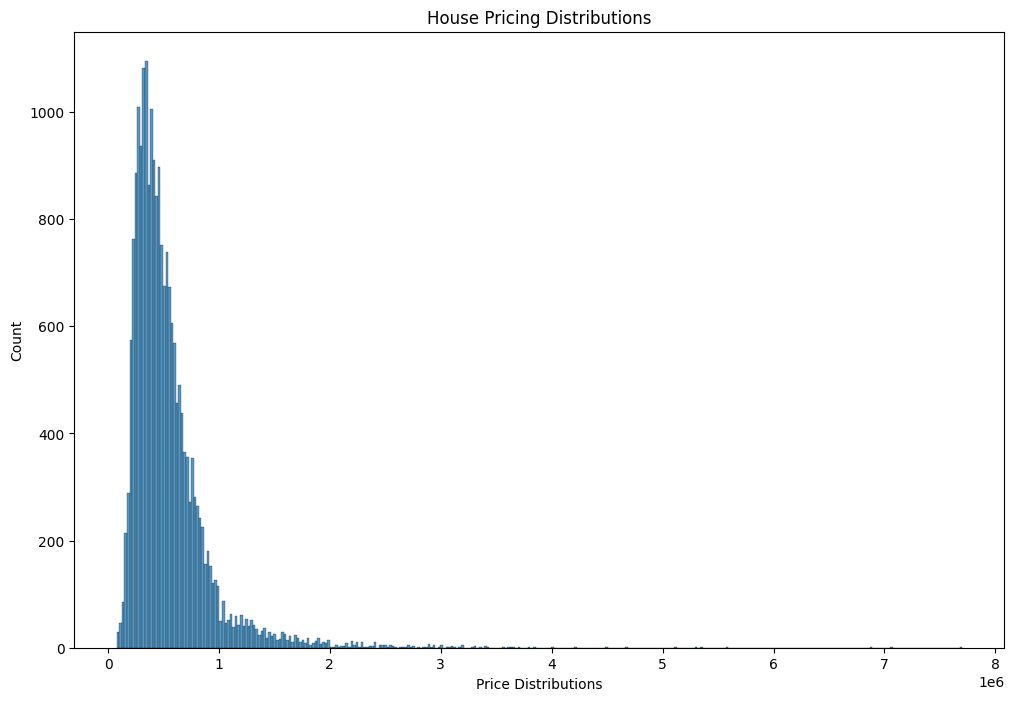

In [65]:
# Density plot
plt.figure(figsize = (12,8))
price_dist = sns.histplot(df['price'])
price_dist.set(xlabel="Price Distributions", ylabel=("Count"), title="House Pricing Distributions")
plt.show()


# Living Space versus Price

[Text(0.5, 0, 'Square Foot Living'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Price versus Living Space')]

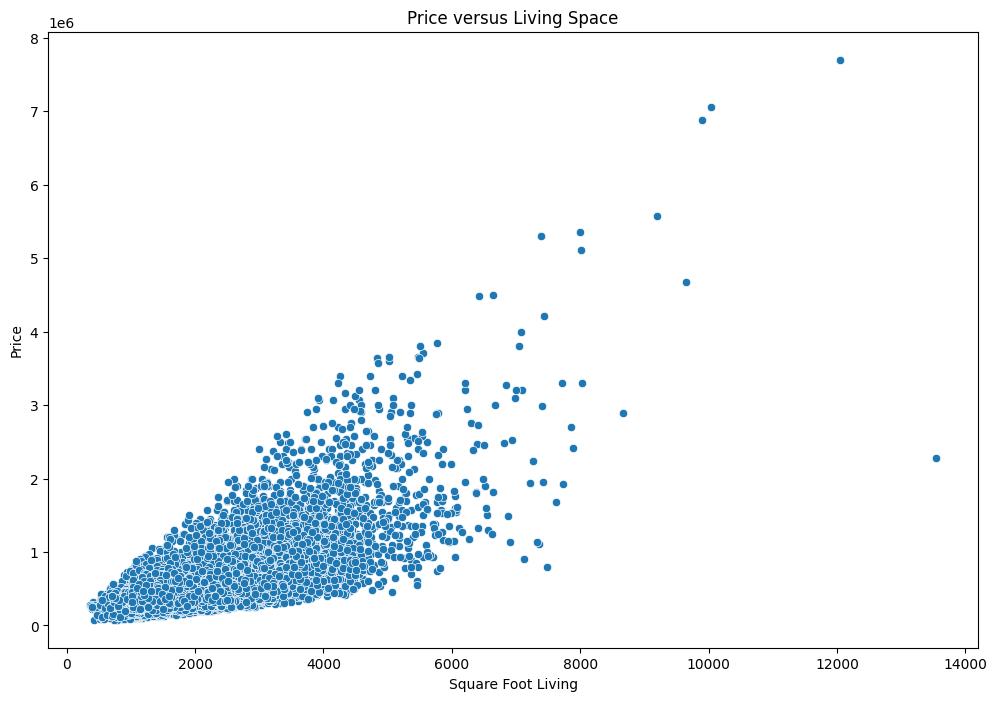

In [66]:
# Square Foot versus Price
plt.figure(figsize=(12,8))
sqft_price = sns.scatterplot(x="sqft_living", y="price", data=df)
sqft_price.set(xlabel="Square Foot Living", ylabel="Price", title="Price versus Living Space")

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Latitude versus Longitude')]

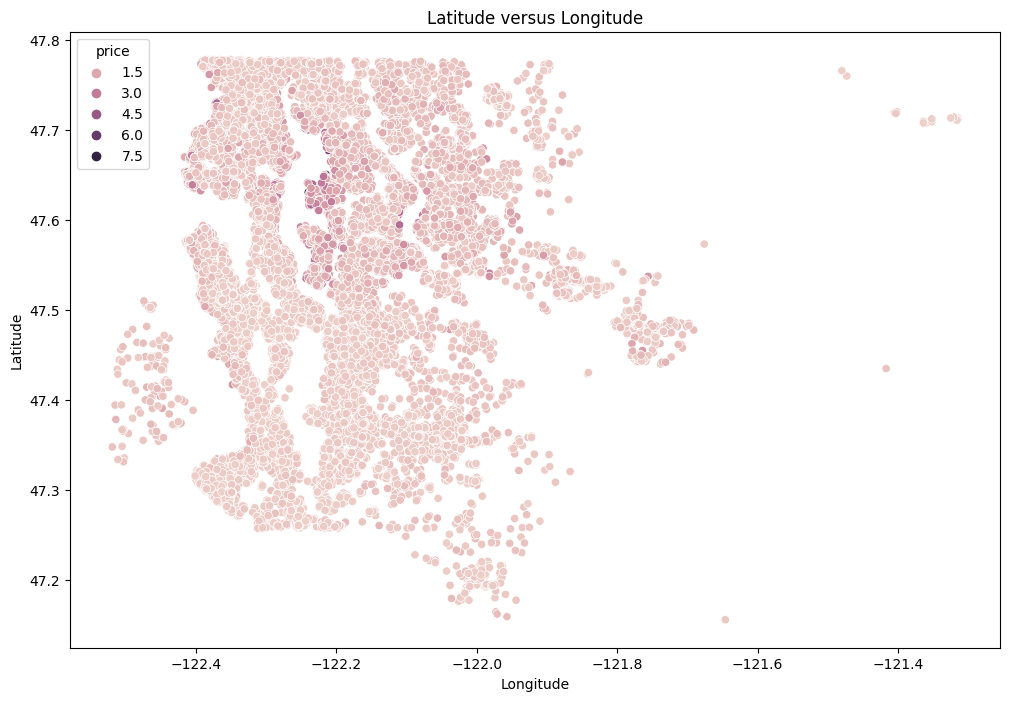

In [67]:
# Latitude and Longitude
plt.figure(figsize = (12,8))
latlong = sns.scatterplot(x='long',y='lat',data=df,hue='price')
latlong.set(xlabel="Longitude", ylabel="Latitude", title="Latitude versus Longitude")

# Correlation Matrix

In [68]:
# View correlation
df.corr()

/var/folders/1t/1q0kyck546jcysb4kj1hhcsw0000gn/T/ipykernel_19527/927824750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,is_renovated
price,1.000000,0.316068,0.525895,0.701925,0.089701,0.256635,0.266436,0.397350,0.036176,0.667849,...,0.127894,-0.053437,0.306810,0.022062,0.585235,0.082494,0.003833,-0.010072,-0.014699,0.126108
bedrooms,0.316068,1.000000,0.527208,0.592808,0.032889,0.182653,-0.006766,0.082593,0.024308,0.366609,...,0.158168,-0.158243,-0.010984,0.135997,0.403883,0.030685,-0.008782,-0.001374,-0.009554,0.019044
bathrooms,0.525895,0.527208,1.000000,0.755787,0.087927,0.502455,0.063743,0.188385,-0.126227,0.665883,...,0.254640,-0.204844,0.024274,0.225090,0.569780,0.087538,-0.026455,0.007372,-0.005083,0.050077
sqft_living,0.701925,0.592808,0.755787,1.000000,0.172952,0.353812,0.103855,0.284721,-0.059097,0.762854,...,0.140647,-0.199815,0.052242,0.241203,0.756274,0.183428,-0.028923,0.011949,-0.007362,0.055073
sqft_lot,0.089701,0.032889,0.087927,0.172952,1.000000,-0.005081,0.021605,0.074804,-0.008891,0.113969,...,-0.067762,-0.129544,-0.085659,0.229562,0.144663,0.718545,0.005481,-0.002371,0.000624,0.007746
floors,0.256635,0.182653,0.502455,0.353812,-0.005081,1.000000,0.023730,0.028740,-0.263944,0.458593,...,0.052860,-0.059486,0.049319,0.126054,0.279860,-0.011117,-0.022401,0.014229,-0.006537,0.006301
waterfront,0.266436,-0.006766,0.063743,0.103855,0.021605,0.023730,1.000000,0.401972,0.016642,0.082878,...,-0.102677,0.030273,-0.014286,-0.041901,0.086505,0.030711,-0.004162,0.008133,0.010532,0.093285
view,0.397350,0.082593,0.188385,0.284721,0.074804,0.028740,0.401972,1.000000,0.046108,0.251708,...,-0.054334,0.084626,0.005931,-0.078116,0.280671,0.072707,0.001287,-0.005447,0.011419,0.104109
condition,0.036176,0.024308,-0.126227,-0.059097,-0.008891,-0.263944,0.016642,0.046108,1.000000,-0.146317,...,-0.368537,0.002787,-0.015087,-0.105771,-0.092954,-0.003257,-0.045707,0.022228,-0.004645,-0.060232
grade,0.667849,0.366609,0.665883,0.762854,0.113969,0.458593,0.082878,0.251708,-0.146317,1.000000,...,0.243086,-0.185755,0.113708,0.200419,0.713525,0.119689,-0.030448,0.008687,-0.012547,0.013916


/var/folders/1t/1q0kyck546jcysb4kj1hhcsw0000gn/T/ipykernel_19527/4115863042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()
/var/folders/1t/1q0kyck546jcysb4kj1hhcsw0000gn/T/ipykernel_19527/4115863042.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cor_matrix, dtype=np.bool)


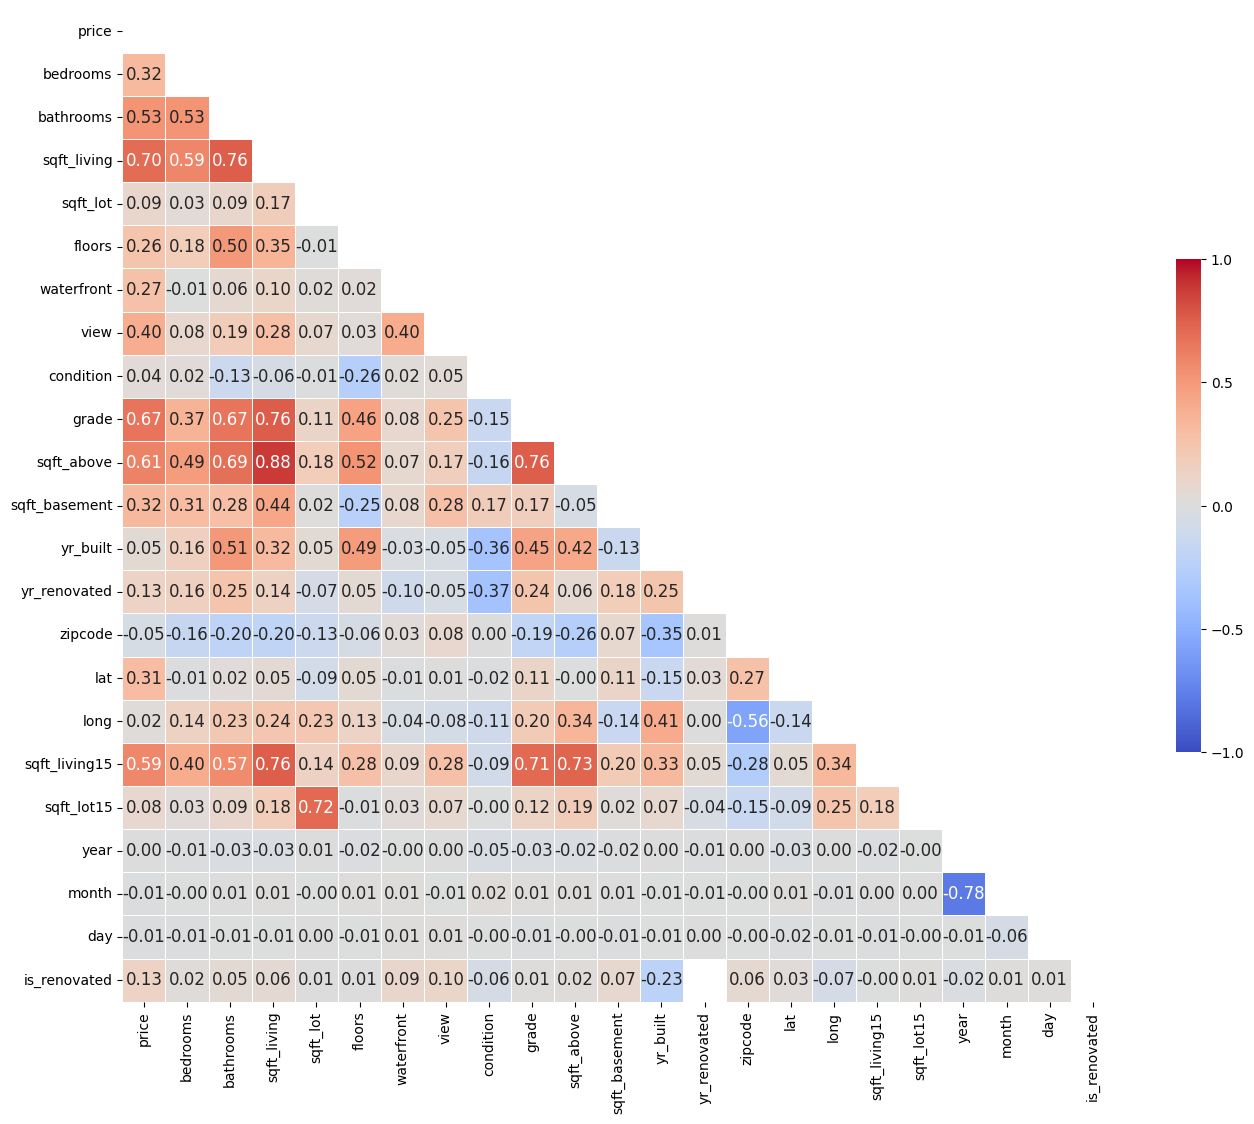

In [70]:
# Define correlation matrix
cor_matrix = df.corr()

# Check out https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d to learn more about this code!
f, ax = plt.subplots(figsize=(16, 16)) 

mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(cor_matrix, 
            mask=mask,
            square = True,
            linewidths = .5,
            cmap = "coolwarm",
            cbar_kws = {'shrink': .4, 
                    "ticks" : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {"size": 12},
            fmt = ".2f")

ax.set_yticklabels(cor_matrix.columns, rotation = 0)
ax.set_xticklabels(cor_matrix.columns)
plt.show()


# Training and Testing Model